## Analysis of CMOS event data for Am-241
***

### _source used: Am-241(D100)_

### 1. Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage import io
from skimage.feature import blob_dog, blob_log, blob_doh
#from skimage.color import rgb2gray
import copy # deep copy for dictionary
import cmosdet as rd # self-written library

---
_**Listing all files/folders in working environment**_

In [2]:
ls ../Am241

Am241_ListOfFiles.txt   Am_D100_2cm_m1.txt      Am_D100_4cm_m2.txt
Am_D100_0cm_m1.avi      Am_D100_2cm_m2.avi      Am_D100_4cm_m3.avi
Am_D100_0cm_m1.avi.txt  Am_D100_2cm_m2.avi.txt  Am_D100_4cm_m3.avi.txt
Am_D100_0cm_m1.txt      Am_D100_2cm_m2.txt      Am_D100_4cm_m3.txt
Am_D100_0cm_m2.avi      Am_D100_2cm_m3.avi      Am_D100_5cm_m1.avi
Am_D100_0cm_m2.avi.txt  Am_D100_2cm_m3.avi.txt  Am_D100_5cm_m1.avi.txt
Am_D100_0cm_m2.txt      Am_D100_2cm_m3.txt      Am_D100_5cm_m1.txt
Am_D100_0cm_m3.avi      Am_D100_3cm_m1.avi      Am_D100_5cm_m2.avi
Am_D100_0cm_m3.avi.txt  Am_D100_3cm_m1.avi.txt  Am_D100_5cm_m2.avi.txt
Am_D100_0cm_m3.txt      Am_D100_3cm_m1.txt      Am_D100_5cm_m2.txt
Am_D100_1cm_m1.avi      Am_D100_3cm_m2.avi      Am_D100_5cm_m3.avi
Am_D100_1cm_m1.avi.txt  Am_D100_3cm_m2.avi.txt  Am_D100_5cm_m3.avi.txt
Am_D100_1cm_m1.txt      Am_D100_3cm_m2.txt      Am_D100_5cm_m3.txt
Am_D100_1cm_m2.avi      Am_D100_3cm_m3.avi      ImageAm241/
Am_D100_1cm_m2.avi.txt  Am_D100_3cm_m3.avi.txt  Image

_**Open and listed all the .avi files for processing**_

In [3]:
fh = open('../Am241/Am241_ListOfFiles.txt','r')
fc = fh.readlines()
fh.close()
fc # contains the names of all .avi files

['/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_0cm_m1.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_0cm_m2.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_0cm_m3.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_1cm_m1.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_1cm_m2.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_1cm_m3.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_2cm_m1.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_2cm_m2.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_2cm_m3.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_3cm_m1.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_3cm_m2.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_3cm_m3.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_4cm_m1.avi\n',
 '/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_4cm_m2.avi\n',
 '/hom

_**Processed each .avi files into a concantenated 2D array for each classification**_

In [4]:
a = rd.cmosdet()
b = a.process(filename='../Am241/Am_D100_0cm_m1.avi')

# vstack template for each parameters
meanAll = b['mean']
minAll = b['min']
maxAll = b['max']
medianAll = b['median']
#array3DAll = b['3D array']

print (meanAll[0].shape)

for i,j in enumerate(fc[1:]):
    b = a.process(filename=j.replace('\n',''))
    
    meanAll = np.vstack((meanAll,b['mean']))
    minAll = np.vstack((minAll,b['min']))
    maxAll = np.vstack((maxAll,b['max']))
    medianAll = np.vstack((medianAll,b['median']))
    
    #array3DAll = np.vstack((array3DAll,b['3D array'])) # 4D stacking


CMOS radiation detector
______________________
START
______________________

----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  ../Am241/Am_D100_0cm_m1.avi
END
time : 6.023590803146362
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
()
----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  /home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_0cm_m2.avi
END
time : 4.7257771492004395
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
--------------------------------

END
time : 4.636792182922363
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************


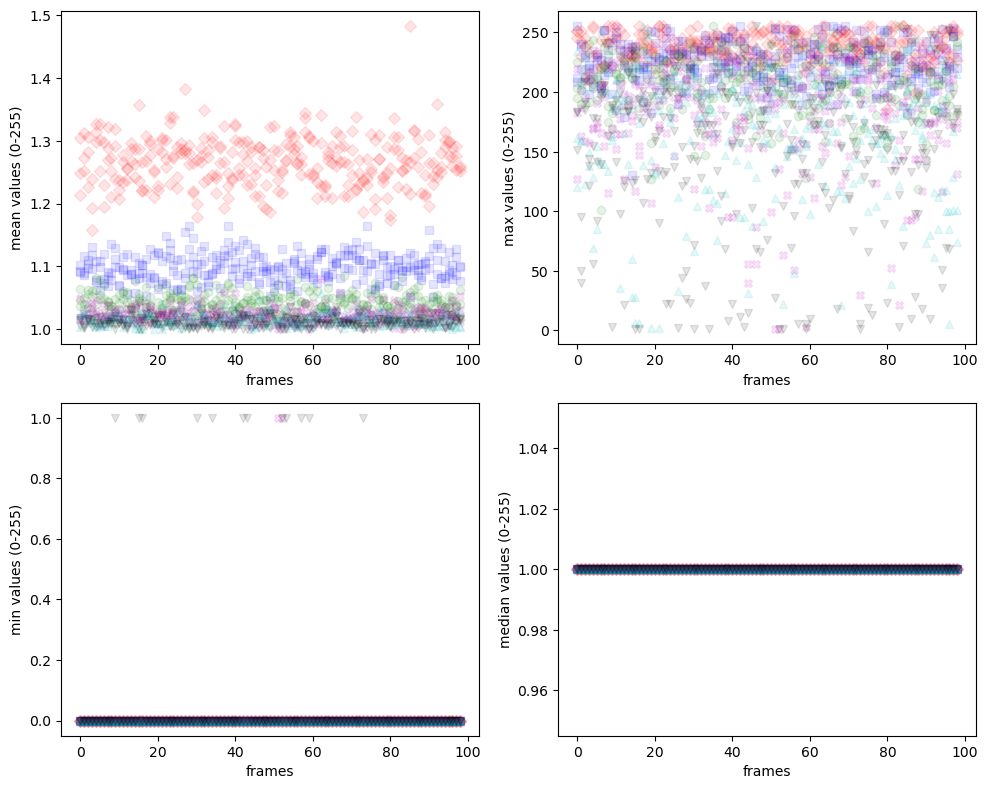

In [5]:
%matplotlib inline

plt.figure(figsize=(10,8))

markStyle = ['D','s','o','X','^','v']
markColor = ['r','b','g','m','c','k']
ctr = 0
idx = 0
# plot mean, min, median
plt.subplot(2,2,1)
for i in meanAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(i, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('mean values (0-255)')
plt.xlabel('frames')

ctr = 0
idx = 0
plt.subplot(2,2,2)
for j in maxAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(j, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('max values (0-255)')
plt.xlabel('frames')

ctr = 0
idx = 0
plt.subplot(2,2,3)
for k in minAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(k, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('min values (0-255)')
plt.xlabel('frames')

ctr = 0
idx = 0
plt.subplot(2,2,4)
for l in medianAll:
    if ctr > 2:
        ctr = 0
        idx = idx+1
    mark = markColor[idx] + markStyle[idx]
    plt.plot(l, mark, alpha=0.1)
    ctr = ctr + 1

#plt.yscale('log')
plt.ylabel('median values (0-255)')
plt.xlabel('frames')

plt.tight_layout()
plt.show()

In [6]:
# last file still under object
fc[-1]

'/home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_5cm_m3.avi\n'

---
### 2. Data processes and functions evaluation

---
Function below calculates events at image using _**Laplacian of Gaussian**_ algorithm

In [7]:
import matplotlib.image as mpimg

In [8]:
def logProcess(imageName, frameNo, editedArray, minSigma, maxSigma, numSigma,\
               thrs, ovlp, clusterSize, medValFrame):

    clusterSum = np.array([])
    clusterMax = np.array([])
    clusterArea = np.array([])
        
    # median
        
    # Laplacian of Gaussian Analyses
        
    blobs_log = blob_log(editedArray, min_sigma=minSigma, max_sigma=maxSigma, num_sigma=numSigma,\
                         threshold=thrs, overlap=ovlp)
    #print ("Frame No", frameNo)
    #print (blobs_log)

    # Extracting x,y indices of LOG value
    indexArr = blobs_log[:,:2].astype('int') # all rows, column 0 and 1 only
        
    indexRow = indexArr[:,0] # column 0 in blob_log
    indexCol = indexArr[:,1] # column 1 in blob_log
        
    # column 2 in blob_log is sigma data

    # Adding columns of pixel values to LOG array (intensity and gaussian areas)
    # --------------------------------------------------------------------------
    # 1. Getting intensity data for x,y LOG indices from original array
    # and put them in new column in new LOG array (after minus medValFrame)
    seltestData = editedArray[(indexRow,indexCol)]-medValFrame
    #print (seltestData)
    seltestData = seltestData.reshape(1,seltestData.shape[0]) # reshape as column

    # example: np.concatenate((a, b.T), axis=1)
    blobs_logAdd = np.concatenate((blobs_log,seltestData.T),axis=1) # 3  - add column 3 (max peak)
    #===========================================================================

    # 2. Adding max peak cluster value and cumulative charge cluster value
    # --------------------------------------------------------------------------
    # summing & max cluster data
    clusterLim = int(clusterSize/2)
        
    for indNo, indRowVal in enumerate(indexRow):
        sliceCluster = editedArray[indRowVal-clusterLim:indRowVal+clusterLim+1,\
                                   indexCol[indNo]-clusterLim:indexCol[indNo]+clusterLim+1]
            
        '''mpimg.imsave("../Am241/ImageAm241/"+imageName+\
                         '_'+str(frameNo)+'_'+str(indNo)+".png", sliceCluster)'''
            
        # considering only value above median value
        sliceClusterAreaVal = ((sliceCluster-medValFrame)>0)*1 # just area value
        sliceClusterVal = sliceClusterAreaVal*sliceCluster # intensity area value (already minus medValFrame)
            
            

        #clusterMax = np.append(clusterMax,sliceCluster.max()) # add max peak cluster value
        #clusterSum = np.append(clusterSum,np.sum(sliceCluster)) # add cumulative charge cluster value
            
        clusterArea = np.append(clusterArea,np.sum(sliceClusterAreaVal)) # add area value only
        clusterMax = np.append(clusterMax,sliceClusterVal.max()) # add max peak cluster value
        clusterSum = np.append(clusterSum,np.sum(sliceClusterVal)) # add cumulative charge cluster value

    #----------------------- end summing & max cluster data -------------------------
        
    clusterDataArea = clusterArea.reshape(1,clusterArea.shape[0])
    clusterDataMax = clusterMax.reshape(1,clusterMax.shape[0])
    clusterDataSum = clusterSum.reshape(1,clusterSum.shape[0])
    # example: np.concatenate((a, b.T), axis=1)
    blobs_logAdd = np.concatenate((blobs_logAdd,clusterDataMax.T),axis=1) # add column 4 (cluster max value)
    blobs_logAdd = np.concatenate((blobs_logAdd,clusterDataSum.T),axis=1) #add column 5 (cluster sum value)
    blobs_logAdd = np.concatenate((blobs_logAdd,clusterDataArea.T),axis=1) #add column 6 (cluster area sum value)
        

    # blobs_logAdd -> each row [y,x,sigma,value,charge cluster value,peak cluster value]
        
    #print (blobs_logAdd)

    return (blobs_logAdd)

In [9]:
# last file processed: Am_D100_5cm_m3.avi
b['3D array'].shape 

(99, 480, 640)

In [10]:
# Enlarging the original array
t1 = 10 # enlarging it by adding 10 pixel on x and y axes
la = b['3D array'] # la = last array

arrayCsL = np.zeros(la.shape[0]*(la.shape[1]+t1*2)*(la.shape[2]+t1*2)).\
reshape(la.shape[0],la.shape[1]+t1*2,la.shape[2]+t1*2)

In [11]:
# check the template array shape
arrayCsL.shape

(99, 500, 660)

In [12]:
# the small array area that matched measured array
arrayCsL[:,t1:-t1,t1:-t1].shape 

(99, 480, 640)

In [ ]:
fwLOG = open('../Am241/logAm241All.txt','w+')

for i,j in enumerate(fc[:]): # processing each video files
    
    imageName = j.split('/')[-1].replace('.avi\n','_')
           
    b = a.process(filename=j.replace('\n',''))

    medValFrame = b['median']
    
    #minSigma,maxSigma,thrs,ovlp = 2,3.0,1,0.1
    #minSigma,maxSigma,thrs,ovlp = 2,3,30,0.5,20
    minSigma, maxSigma, numSigma, thrs, ovlp, clusterSize = 3,6,2,6,0.05,20
    
    logCs = np.array([[0,0,0,0,0,0,0]]) # return template for logProcess
    
    for p,q in enumerate(arrayCsL): # running LOG for each frame in a video file
        
        #medValFrame = np.median(b[0][p]) # median value for each original frame
        #medValFrame = 5
        
        #print (q[t1:-t1,t1:-t1].shape)
        
        frameNo = p
        
        q[t1:-t1,t1:-t1]=copy.deepcopy(b['3D array'][p]) # assigning the smaller frame into new larger frame
        editedArray = q


        logData = logProcess(imageName, frameNo, editedArray, minSigma, maxSigma, numSigma,\
                             thrs, ovlp, clusterSize, medValFrame[p])

        logCs = np.concatenate((logCs, logData), axis=0) # concantenate data for each frame
        
        
        #print (q.shape) # Checking
        
    filenameLOG = j.replace('\n','')+'.txt'
    fwLOG.write(filenameLOG+'\n')
    np.savetxt(filenameLOG,logCs[1:], delimiter=',') # minus the initial values of the logCs template

fwLOG.close()
    


----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  /home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_0cm_m1.avi
END
time : 4.664482116699219
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
----------------------------------------

*CALCULATING mean, min, max, median for each frame from a measurement movie file*

*as well as contructing 3D array of the movie*

----------------------------------------

processing file:  /home/msi-ndt/Workspace/CMOS/Nov29_2021/Am241/Am_D100_0cm_m2.avi
END
time : 4.677395582199097
*RETURN {'3D array', 'mean', 'min', 'max' and 'median'}*

****************************************************************************
----------------------------------------

*CALCULATING mean, min, max, media

In [ ]:
# Listing all the generated .txt data file
fhLOG = open('../Am241/logAm241All.txt','r')
fcLOG = fhLOG.readlines()
fhLOG.close()
fcLOG

---
Creating library for all pair of files and data

In [ ]:
prefix = '../Am241/'
suffix = '\n'

AmLOG = {}

for i, j in enumerate(fcLOG):
    
    fileArray = np.genfromtxt(j.replace(suffix,''),delimiter=',')
    AmLOG[j.replace(prefix,'').replace(suffix,'')]=fileArray

In [ ]:
AmLOG

In [ ]:
# Creating dictionary for max, sum and area data from all files
clusterData={'max':np.array([]),'sum':np.array([]),'area':np.array([])}

for i,j in enumerate(AmLOG):
    if i<=2:
        clusterData['max'] = np.append(clusterData['max'],AmLOG[j][:,4])
        clusterData['sum'] = np.append(clusterData['sum'],AmLOG[j][:,5])
        clusterData['area'] = np.append(clusterData['area'],AmLOG[j][:,6])
    else:
        pass
        
    
print (clusterData['max'].max(),clusterData['sum'].max(),clusterData['area'].max())

print (clusterData['max'].min(),clusterData['max'].max())
print (clusterData['sum'].min(),clusterData['sum'].max())
print (clusterData['area'].min(),clusterData['area'].max())


---
Plotting the stair plots

In [ ]:
countsMax, binsMax = np.histogram(clusterData['max'], bins=40)
countsSum, binsSum = np.histogram(clusterData['sum'], bins=100)
countsArea, binsArea = np.histogram(clusterData['area'], bins=40)

In [ ]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.set_title('max channels')
ax2.set_title('sum channels')
ax3.set_title('area channels')

fig.set_size_inches(16, 6)
    
ax1.stairs(countsMax, binsMax)
ax2.stairs(countsSum, binsSum)
ax3.stairs(countsArea, binsArea)

ax1.set_xlabel('channels')
ax2.set_xlabel('channels')
ax3.set_xlabel('channels')

ax1.set_ylabel('counts')
ax2.set_ylabel('counts')
ax3.set_ylabel('counts')

ax2.set_xlim(0,8000)


'''ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.grid(True,which='both', axis='both',lw=3)
ax2.grid(True,which='both', axis='both',lw=3)
ax3.grid(True,which='both', axis='both',lw=3)'''
plt.show()

## FINISH